### This dataset contains the daily number of bicycles for hire between 2011 and 2012 in London's bicycle sharing system, relying on weather and seasonal information.
### Here, our goal is to analyze and check the number of rented bicycles, rental time and related weather conditions.



## Import Libraries and Dataset

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('data1.csv')
df

,dteday,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1/1/2011,0,6.0,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,1/2/2011,0,0.0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,1/3/2011,0,1.0,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,1/4/2011,0,2.0,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,1/5/2011,0,3.0,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
731,12/27/2012,0,4.0,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114.0
732,12/28/2012,0,5.0,1,2,0.253333,0.255046,0.590000,0.155471,644.0,2451.0,3095.0
733,12/29/2012,0,6.0,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341.0
734,12/30/2012,0,0.0,0,1,0.255833,0.231700,0.483333,0.350754,364.0,1432.0,1796.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      736 non-null    object 
 1   holiday     736 non-null    int64  
 2   weekday     734 non-null    float64
 3   workingday  736 non-null    int64  
 4   weathersit  736 non-null    int64  
 5   temp        734 non-null    float64
 6   atemp       736 non-null    float64
 7   hum         735 non-null    float64
 8   windspeed   736 non-null    float64
 9   casual      734 non-null    float64
 10  registered  733 non-null    float64
 11  cnt         735 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 69.1+ KB


## Convert Date column

In [11]:
df['year'] = pd.DatetimeIndex(df['dteday']).year
df['month'] = pd.DatetimeIndex(df['dteday']).month
df

,dteday,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1/1/2011,0,6.0,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,2011,1
1,1/2/2011,0,0.0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,2011,1
2,1/3/2011,0,1.0,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,2011,1
3,1/4/2011,0,2.0,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,2011,1
4,1/5/2011,0,3.0,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,12/27/2012,0,4.0,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114.0,2012,12
732,12/28/2012,0,5.0,1,2,0.253333,0.255046,0.590000,0.155471,644.0,2451.0,3095.0,2012,12
733,12/29/2012,0,6.0,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341.0,2012,12
734,12/30/2012,0,0.0,0,1,0.255833,0.231700,0.483333,0.350754,364.0,1432.0,1796.0,2012,12


In [12]:
def season (x) :
    if x <= 3:
        return (1)
    elif  3<x <= 6:
        return (2)
    elif 6<x <= 9 :
        return (3)
    elif 9<x <= 12:
        return (4)
    
df['season'] = df['month'].map(season)
df

,dteday,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,season
0,1/1/2011,0,6.0,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,2011,1,1
1,1/2/2011,0,0.0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,2011,1,1
2,1/3/2011,0,1.0,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,2011,1,1
3,1/4/2011,0,2.0,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,2011,1,1
4,1/5/2011,0,3.0,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,12/27/2012,0,4.0,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114.0,2012,12,4
732,12/28/2012,0,5.0,1,2,0.253333,0.255046,0.590000,0.155471,644.0,2451.0,3095.0,2012,12,4
733,12/29/2012,0,6.0,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341.0,2012,12,4
734,12/30/2012,0,0.0,0,1,0.255833,0.231700,0.483333,0.350754,364.0,1432.0,1796.0,2012,12,4


### Creating new features based on current knowledge

In [13]:
df['temp/hum'] = df['temp'] / df['hum']

df['temp/windspeed'] = df['temp'] / df['windspeed']

df['hum/windspeed'] = df['hum'] / df['windspeed']

df.head()

,dteday,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,season,temp/hum,temp/windspeed,hum/windspeed
0,1/1/2011,0,6.0,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,2011,1,1,0.427095,2.145064,5.022456
1,1/2/2011,0,0.0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,2011,1,1,0.522173,1.462459,2.800715
2,1/3/2011,0,1.0,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,2011,1,1,0.449065,0.790805,1.761003
3,1/4/2011,0,2.0,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,2011,1,1,0.338733,1.247692,3.683404
4,1/5/2011,0,3.0,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,2011,1,1,0.519404,1.214323,2.337919


### Organize Columns and deal with NaN values

In [14]:
df = df.drop(['dteday'], axis = 1)

df = df[['year', 'month', 'season', 'holiday', 'weekday', 'workingday',
        'weathersit', 'temp', 'atemp', 'hum', 'windspeed','temp/hum', 'temp/windspeed','hum/windspeed', 'casual', 'registered','cnt']]

In [16]:
df.replace([np.inf, -np.inf], np.NaN, inplace=True)
df.dropna(inplace=True)

In [18]:
df.describe()

,year,month,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,temp/hum,temp/windspeed,hum/windspeed,casual,registered,cnt
count,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000
mean,2011.503439,6.485557,2.495186,0.028886,2.998624,0.682256,1.392022,0.496522,0.475233,0.628344,0.190981,0.823539,3.188346,4.096175,852.327373,3655.259972,4507.587345
std,0.500332,3.441282,1.113239,0.167601,2.009276,0.465920,0.542001,0.183893,0.163893,0.141005,0.078180,0.357260,2.082636,2.652652,688.956179,1552.949136,1932.489211
min,2011.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,0.147826,0.311574,0.370307,2.000000,20.000000,22.000000
25%,2011.000000,4.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.519583,0.134950,0.540684,1.648103,2.451940,317.000000,2503.500000,3192.000000
50%,2012.000000,6.000000,2.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180975,0.772414,2.720807,3.478714,723.000000,3667.000000,4548.000000
75%,2012.000000,9.000000,3.000000,0.000000,5.000000,1.000000,2.000000,0.656250,0.610803,0.730833,0.233214,1.044310,4.278512,4.870264,1109.000000,4756.500000,5929.500000
max,2012.000000,12.000000,4.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,2.344262,22.813498,30.554491,3410.000000,6946.000000,8714.000000


In [19]:
df.isna().sum()

year              0
month             0
season            0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed         0
temp/hum          0
temp/windspeed    0
hum/windspeed     0
casual            0
registered        0
cnt               0
dtype: int64

In [20]:
df.drop_duplicates()
df

,year,month,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,temp/hum,temp/windspeed,hum/windspeed,casual,registered,cnt
0,2011,1,1,0,6.0,0,2,0.344167,0.363625,0.805833,0.160446,0.427095,2.145064,5.022456,331.0,654.0,985.0
1,2011,1,1,0,0.0,0,2,0.363478,0.353739,0.696087,0.248539,0.522173,1.462459,2.800715,131.0,670.0,801.0
2,2011,1,1,0,1.0,1,1,0.196364,0.189405,0.437273,0.248309,0.449065,0.790805,1.761003,120.0,1229.0,1349.0
3,2011,1,1,0,2.0,1,1,0.200000,0.212122,0.590435,0.160296,0.338733,1.247692,3.683404,108.0,1454.0,1562.0
4,2011,1,1,0,3.0,1,1,0.226957,0.229270,0.436957,0.186900,0.519404,1.214323,2.337919,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2012,12,4,0,4.0,1,2,0.254167,0.226642,0.652917,0.350133,0.389279,0.725916,1.864769,247.0,1867.0,2114.0
732,2012,12,4,0,5.0,1,2,0.253333,0.255046,0.590000,0.155471,0.429378,1.629455,3.794920,644.0,2451.0,3095.0
733,2012,12,4,0,6.0,0,2,0.253333,0.242400,0.752917,0.124383,0.336469,2.036717,6.053215,159.0,1182.0,1341.0
734,2012,12,4,0,0.0,0,1,0.255833,0.231700,0.483333,0.350754,0.529310,0.729380,1.377983,364.0,1432.0,1796.0


### Visualize and analyze columns

<AxesSubplot:xlabel='temp/windspeed', ylabel='cnt'>

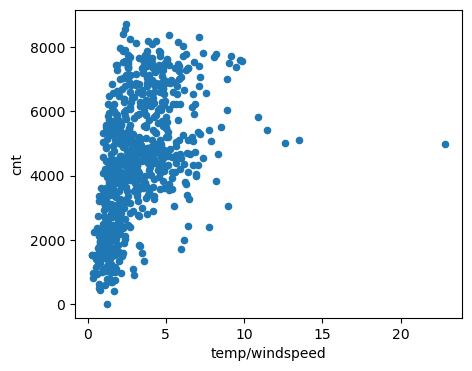

In [21]:
df.plot.scatter ( x = 'temp/windspeed', y = 'cnt', figsize=(5,4))

(0.0, 0.8)

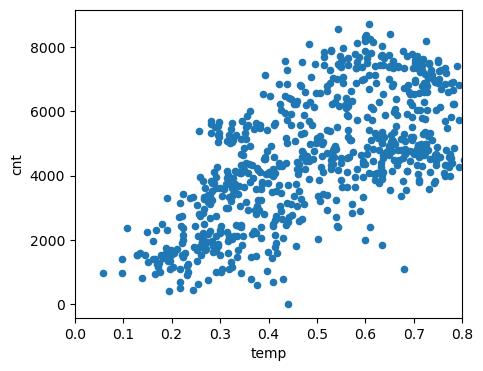

In [22]:
df.plot.scatter ( x = 'temp', y = 'cnt', figsize=(5,4))
plt.xlim(0 , 0.8)

<AxesSubplot:xlabel='temp', ylabel='cnt'>

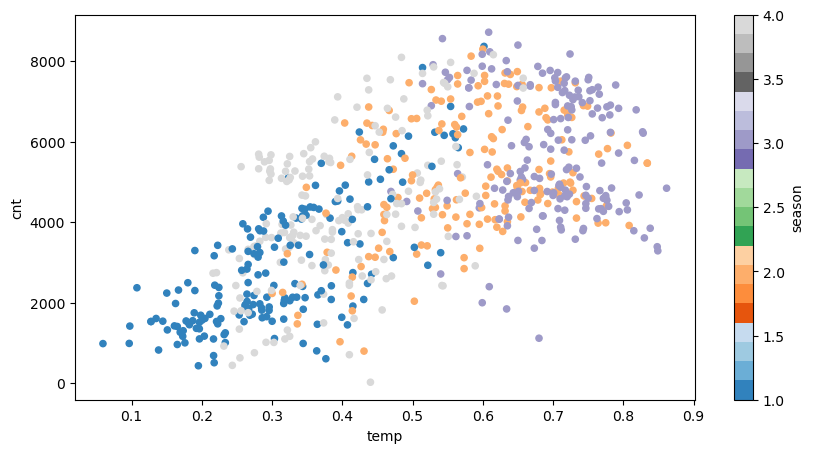

In [23]:
df.plot.scatter( x = 'temp', y = 'cnt', c = 'season', figsize=(10,5), colormap = 'tab20c')

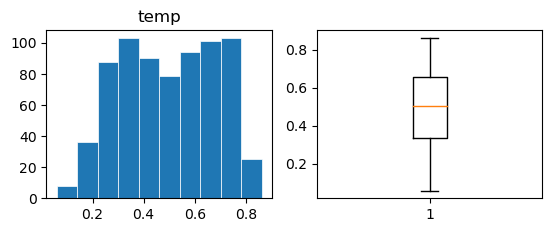

In [24]:
x  = df['temp']

plt.subplot(2, 2, 1) 
plt.hist(x, linewidth=0.5, edgecolor="white")
plt.title('temp')

plt.subplot(2,2,2)
plt.boxplot(x)

plt.show()

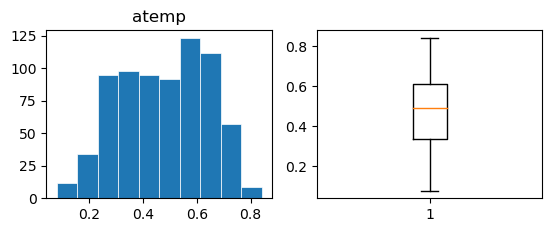

In [25]:
x = df['atemp']

plt.subplot(2, 2, 1)
plt.hist(x ,linewidth=0.5, edgecolor="white")
plt.title('atemp')

plt.subplot(2,2,2)
plt.boxplot(x)

plt.show()

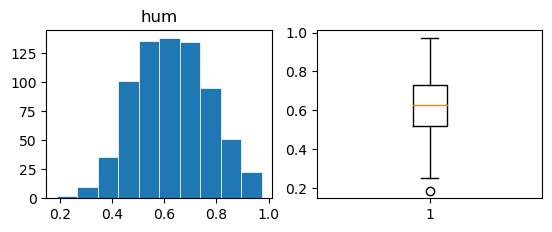

In [26]:
x = df['hum']

plt.subplot(2, 2, 1)
plt.hist(x, linewidth=0.5, edgecolor="white")
plt.title('hum')

plt.subplot(2,2,2)
plt.boxplot(x)

plt.show()

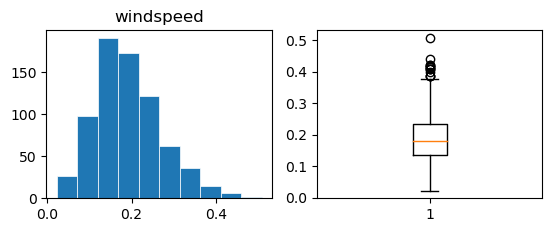

In [27]:
x = df['windspeed']

plt.subplot(2, 2, 1)
plt.hist(x, linewidth=0.5, edgecolor="white")
plt.title('windspeed')

plt.subplot(2,2,2)
plt.boxplot(x)

plt.show()

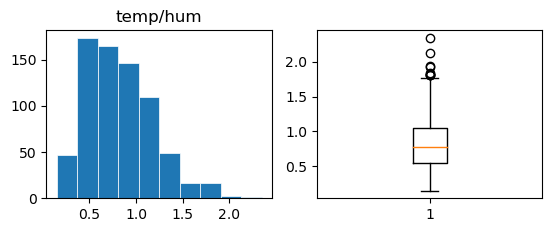

In [28]:
x = df['temp/hum']

plt.subplot(2, 2, 1) 
plt.hist(x, linewidth=0.5, edgecolor="white")
plt.title('temp/hum')

plt.subplot(2,2,2)
plt.boxplot(x)

plt.show()

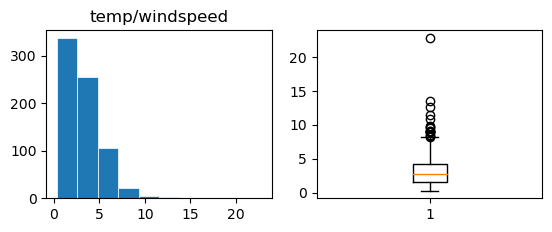

In [29]:
x = df['temp/windspeed']

plt.subplot(2, 2, 1) 
plt.hist(x, linewidth=0.5, edgecolor="white")
plt.title('temp/windspeed')

plt.subplot(2,2,2)
plt.boxplot(x)

plt.show()

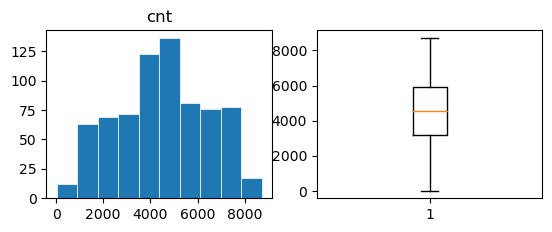

In [30]:
x = df['cnt']

plt.subplot(2, 2, 1) 
plt.hist(x, linewidth=0.5, edgecolor="white")
plt.title('cnt')

plt.subplot(2,2,2)
plt.boxplot(x)

plt.show()

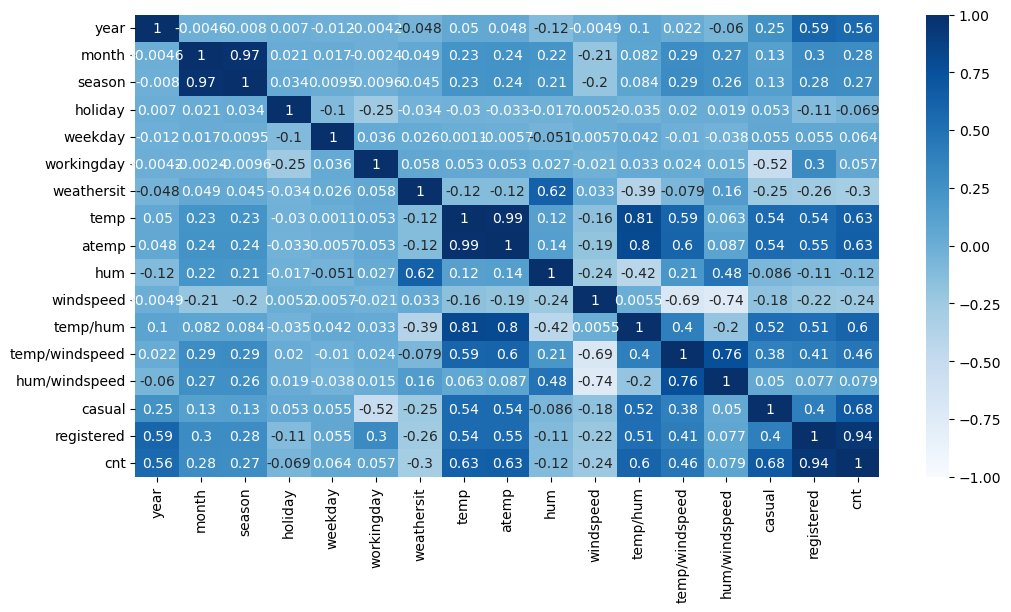

In [31]:
plt.figure(figsize = (12,6))

sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="Blues", annot=True )

plt.show()

### separating related feature and create model

In [32]:
df1 = df[['year', 'temp', 'atemp','temp/hum', 'temp/windspeed', 'casual', 'registered','cnt']]

In [33]:
x = df1[['year', 'temp', 'atemp','temp/hum', 'temp/windspeed']]
y = df1['cnt']

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [36]:
y_pred = regressor.predict (x_test)
y_pred

array([7471.  , 4900.13, 2832.86, 1641.4 , 1914.59, 6229.95, 2987.45,
       6820.54, 4830.79, 4848.22, 5294.77, 1694.22, 7533.5 , 4482.21,
       4611.04, 2864.03, 4033.5 , 2512.19, 6160.81, 3075.34, 1785.27,
        938.  , 1891.36, 4611.29, 1851.63, 7223.62, 6915.91, 6372.54,
       7478.4 , 1027.03, 4674.19, 2475.4 , 5368.54, 3131.99, 4398.13,
       2205.99, 4085.75, 6097.12, 3326.76, 6124.73, 3098.92, 2378.97,
       2188.74, 3294.63, 6903.05, 4576.02, 3850.99, 6741.87, 1208.87,
       5175.52, 4526.98, 6223.88, 5416.23, 4456.84, 6883.19, 2331.09,
       4452.52, 5122.19, 4541.23, 7657.37, 4166.45, 4418.26, 5220.24,
       2872.3 , 3177.45, 2575.77, 5478.24, 4783.09, 5173.02, 4665.05,
        994.6 , 4444.42, 3305.28, 4574.8 , 4254.62, 3964.28, 4540.01,
       3612.35, 7540.38, 2961.55, 4177.6 , 1273.9 , 5994.96, 4424.08,
       5917.38, 7036.07, 4967.78, 6646.77, 4036.27, 7308.58, 3407.32,
       5000.95, 1843.73, 3407.33, 4860.92, 6344.02, 4448.08, 5079.23,
       1800.7 , 4786

In [37]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2))  
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 574.79
Mean squared error = 533160.92
R2 score = 0.84
